___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

las graficas se ven diferente en jupiternotebook, lee https://seaborn.pydata.org/faq.html
se puede modificr si fuese necesario me parece (Why do the plots look fuzzy in a Jupyter notebook?

In [31]:
sns.set_theme(rc={"figure.dpi": 96}) #esto lo agregue yo para que se vean mejor los graficos1

___
## Imports

In [1]:
import seaborn as sns
%matplotlib inline #para ver los graficos en el notebook

UsageError: unrecognized arguments: #para ver los graficos en el notebook


## Data
Seaborn comes with built-in data sets!

In [2]:
tips = sns.load_dataset('tips')

In [ ]:
#https://seaborn.pydata.org/generated/seaborn.load_dataset.html
#https://github.com/mwaskom/seaborn-data

In [4]:
tips.head() #es sobre gente que ceno y dejo propina

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## distplot

The distplot shows the distribution of a univariate set of observations.

C:\Users\palic\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

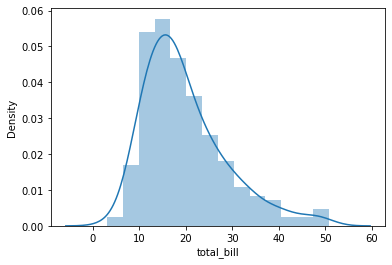

In [14]:
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

C:\Users\palic\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

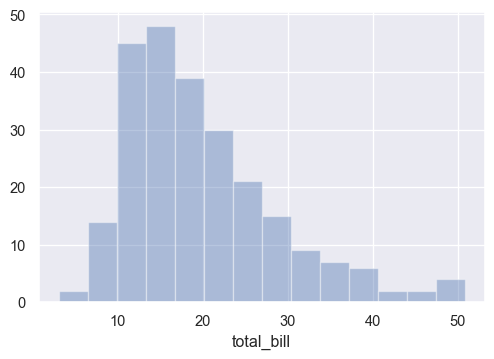

In [32]:
#sin el kde tengo un histograma, una distribucion de las bills, la mayoria estan entre 10 y 20
sns.distplot(tips['total_bill'],kde=False)

To remove the kde layer and just have the histogram use:

<AxesSubplot:xlabel='total_bill'>

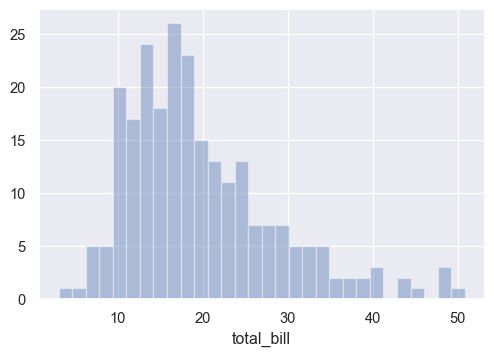

In [33]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

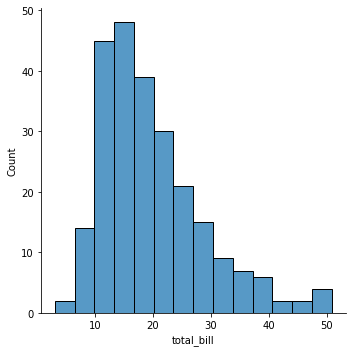

In [17]:
#igual ya no se usa esa funcion, hay otras dos, te lo dice en el mensaje de los resultados arriba

sns.displot(tips['total_bill'],kde=False,bins=30) 

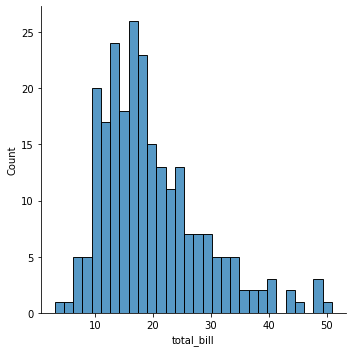

In [24]:
sns.displot(tips['total_bill'],bins=30) 

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

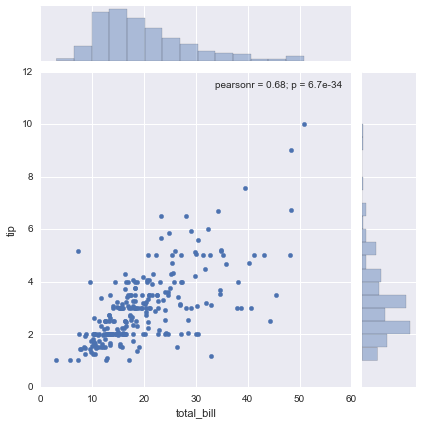

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

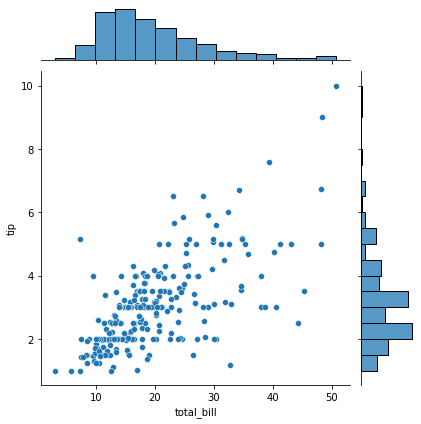

In [26]:
sns.jointplot(x='total_bill',y='tip',data=tips) #por default kind="scatter"

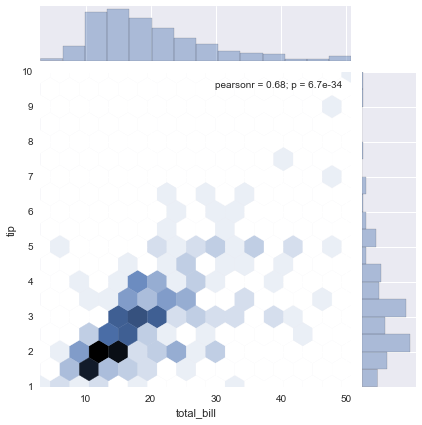

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

cuanto mas oscuro es que tiene una mayor cantidad de datos ahi

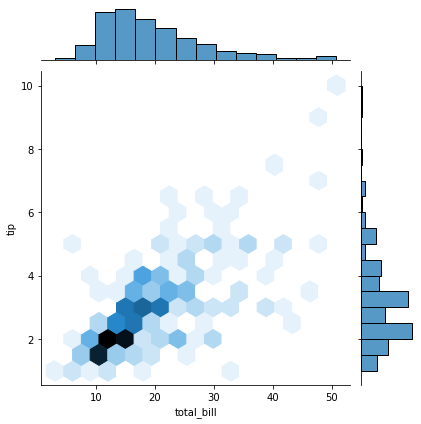

In [27]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

Este grafico te muestra que cuanto mas denso es el color, mas puntos hay, es decir mas datos con ese valor

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


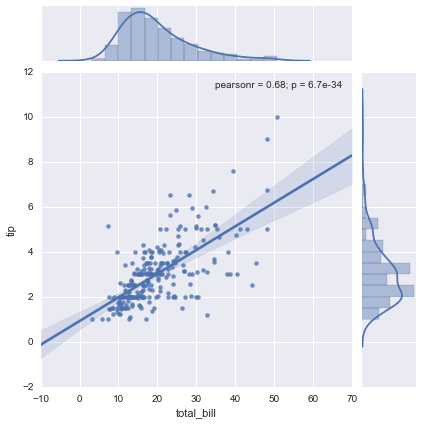

In [17]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

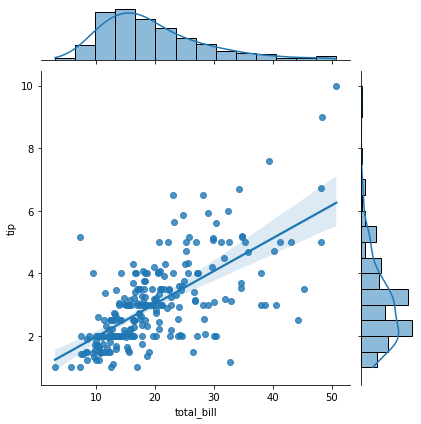

In [28]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

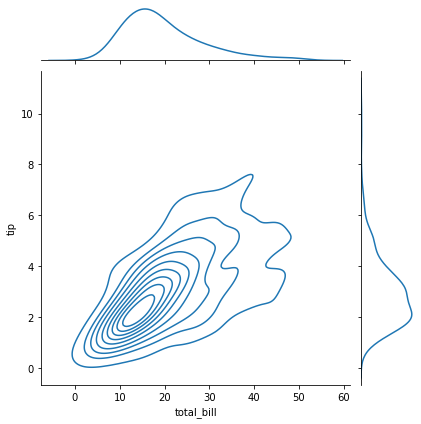

In [30]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')
#bueno se ve mucho mejor que esto en teoria 

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

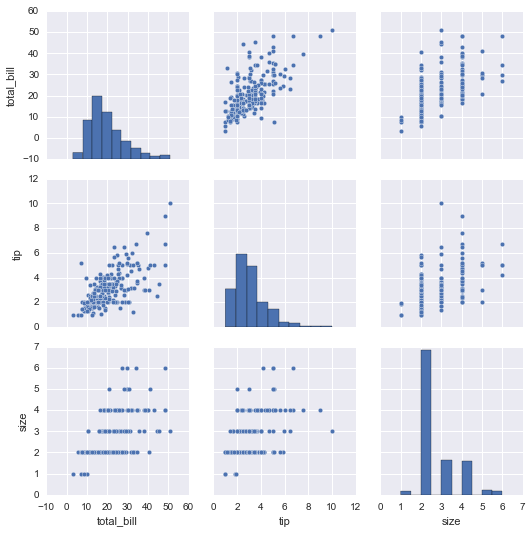

In [18]:
sns.pairplot(tips)

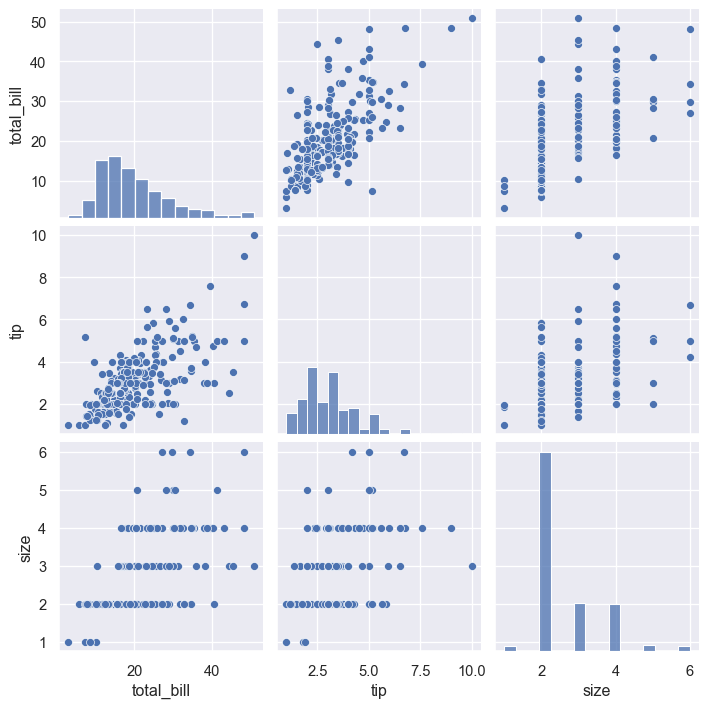

In [34]:
sns.pairplot(tips)

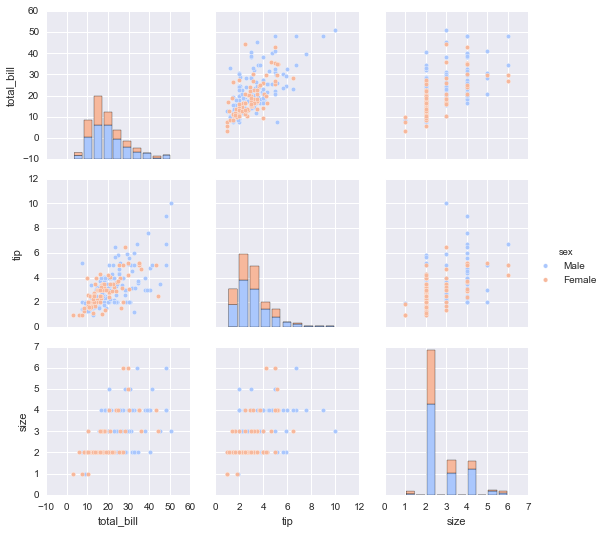

In [21]:
sns.pairplot(tips,hue='sex',palette='coolwarm')
#hue huename of variable in data
#Variable in data to map plot aspects to different colors
# en este caso sexo tenia dos opciones, masculino o femenino

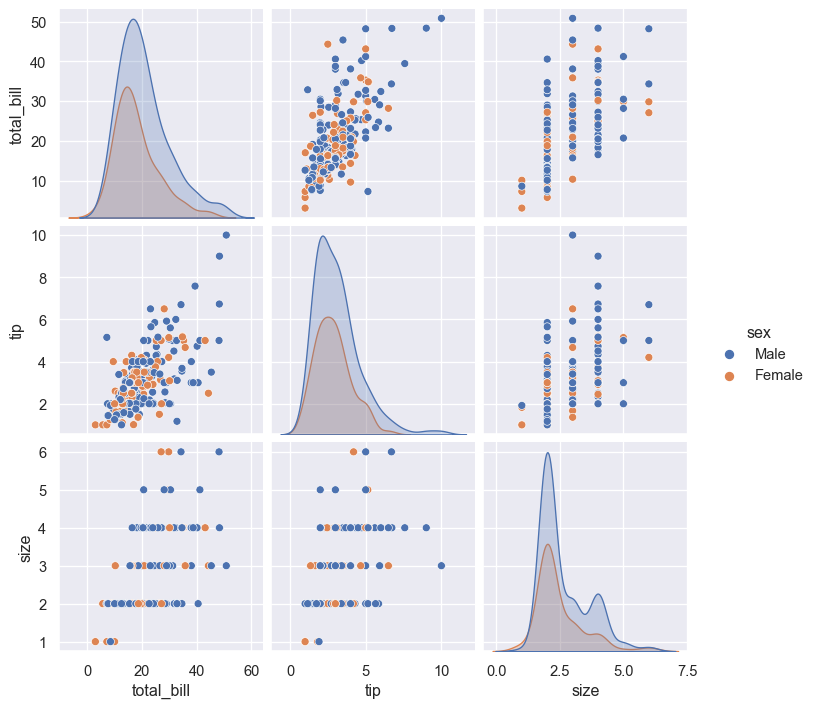

In [38]:
sns.pairplot(tips,hue='sex')

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

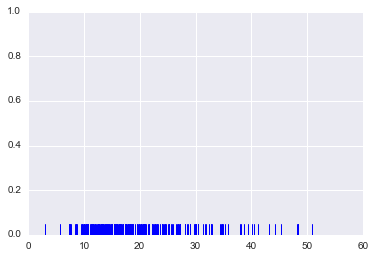

In [22]:
sns.rugplot(tips['total_bill'])

Si lo comparas con el histograma , se corresponde, solo que aca te muestra la densidad y no los valores absolutos 

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0.0, 1.0)

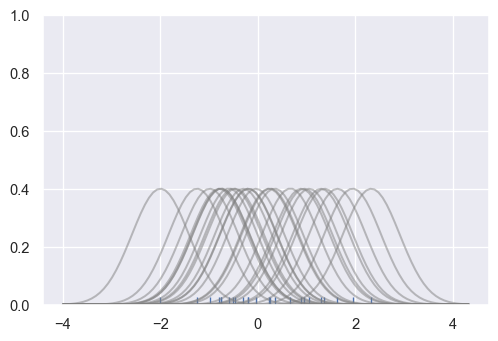

In [39]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

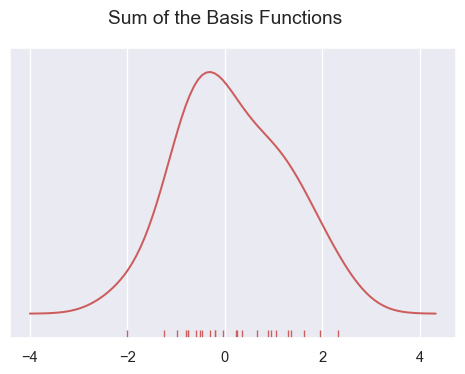

In [40]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

So with our tips dataset:

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

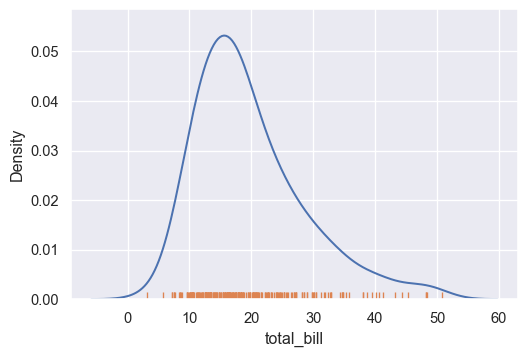

In [41]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


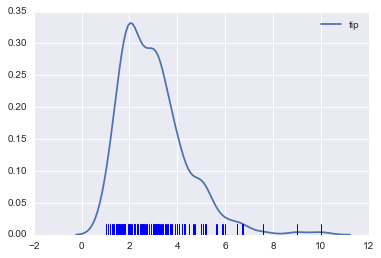

In [42]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# Great Job!